# TOC

**1. [Project description](#1)**

**2. [Data description](#2)**

**3. [Library imports](#3)**

**4. [CSV file read](#4)**

**5. [General information and preprocessing](#5)**

**6. [Data analysis](#6)**
- 6.1 [Investigate the proportions of the various types of establishments. Plot a graph.](#6.1)  
- 6.2 [Investigate the proportions of chain and nonchain establishments. Plot a graph.](#6.2)   
- 6.3 [Which type of establishment is typically a chain?](#6.3)
- 6.4 [What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?](#6.4)  
- 6.5 [Determine the average number of seats for each type of restaurant. On average, which type of restaurant has the greatest number of seats? Plot graphs.](#6.5)  
- 6.6 [Put the data on street names from the address column in a separate column.](#6.6)   
- 6.7 [Plot a graph of the top ten streets by number of restaurants.](#6.7)  
- 6.8 [Find the number of streets that only have one restaurant.](#6.8)   
- 6.9 [For streets with a lot of restaurants, look at the distribution of the number of seats. What trends can you see?](#6.9)

**7. [Conclusion](#7)**

**8. [Presentation](#8)**

# Project description <a id="1"></a>

We’ve decided to open a small robot-run cafe in Los Angeles. The project is promising but expensive, so we and our partners decide to try to attract investors. 
They’re interested in the current market conditions—will we be able to maintain our success when the novelty of robot waiters wears off?

We’re analytics gurus, so our partners have asked us to prepare some market research. We have open-source data on restaurants in LA.

# Data description <a id="2"></a>

**rest_data**:
- object_name — establishment name
- chain — chain establishment (TRUE/FALSE)
- object_type — establishment type
- address — address
- number — number of seats

# Library imports <a id="3"></a>

In [28]:
#Libraries and project environment setup:

##Pandas and Numpy for data preprocessing and manipulation
import pandas as pd
import numpy as np

##Remove warnings
import sys
import warnings
if not sys.warnoptions:
   warnings.simplefilter("ignore");

##Scipy, Math and Random for SDA
from scipy import stats as st
import math
import random

##Matplotlib, Seaborn, Plotly, Altair and Streamlit for visualization
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib import rcParams
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.graph_objects as go
from plotly import tools
import plotly.offline as py
import altair as alt
import streamlit as st

#USAddress for handling USA addresses in DF
import usaddress

# CSV file read <a id="4"></a>

In [29]:
#We use try-except to handle unexpected errors
try:
    rest=pd.read_csv('/datasets/rest_data_us.csv')

except:
    rest=pd.read_csv('https://code.s3.yandex.net/datasets/rest_data_us.csv')

# General information and preprocessing <a id="5"></a>

In [30]:
#First, in order to guarantee efficiency we immediately drop row-based duplicates
rest.drop_duplicates(inplace=True,keep='first')
rest.reset_index(drop=True, inplace=True)

#Print the first five entries in the dataframe
rest.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


No visible NaN values.

In [31]:
#Object names to uppercase
rest['object_name']=rest['object_name'].str.upper()

#Checking to be sure there aren't any additional duplicates
rest.drop(['id'], axis=1).duplicated().sum()
display(rest[rest[['object_name', 'address']].duplicated() == True])

#Check if there are any error number of seats values
rest[rest['number']<0]

,id,object_name,address,chain,object_type,number


,id,object_name,address,chain,object_type,number


None.

In [32]:
#General file examination
rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


- Results show column names are accurate to the project data description.
- Dataset includes 9651 entries and 6 columns.
- There are 3 missing values from the chain column.
- id and number- quantitative values as integers, and the rest- qualitative as objects.

In [33]:
#Checking missing values amount in percentage
rest.chain.isna().sum()*100/len(rest)
pd.DataFrame(round((rest.isna().mean()*100),2)).style.background_gradient('coolwarm')
round(rest.chain.isna().mean()*100,2)

0.03

In [34]:
#By rule of thumb, we don't drop more than 5%-10% of data. Since only 0.03% is, we now drop these entries
rest=rest.dropna().reset_index()
rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        9648 non-null   int64 
 1   id           9648 non-null   int64 
 2   object_name  9648 non-null   object
 3   address      9648 non-null   object
 4   chain        9648 non-null   object
 5   object_type  9648 non-null   object
 6   number       9648 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 527.8+ KB


Done.

In [35]:
#Integrated display of the columns
rest.describe(include='all')

,index,id,object_name,address,chain,object_type,number
count,9648.000000,9648.000000,9648,9648,9648,9648,9648.000000
unique,NaN,NaN,8669,8514,2,6,NaN
top,NaN,NaN,THE COFFEE BEAN & TEA LEAF,3607 TROUSDALE PKWY,False,Restaurant,NaN
freq,NaN,NaN,47,11,5972,7253,NaN
mean,4824.056385,16610.056385,NaN,NaN,NaN,NaN,43.703566
std,2786.049701,2786.049701,NaN,NaN,NaN,NaN,47.627252
min,0.000000,11786.000000,NaN,NaN,NaN,NaN,1.000000
25%,2411.750000,14197.750000,NaN,NaN,NaN,NaN,14.000000
50%,4823.500000,16609.500000,NaN,NaN,NaN,NaN,27.000000
75%,7235.250000,19021.250000,NaN,NaN,NaN,NaN,46.000000


All seems in order.

In [36]:
#Avoiding StreetName errors by running a loop to check the addresses without the street or number
def cleaning_check(raw):
    raw_address=usaddress.parse(raw)
    dict_address={}
    for i in raw_address:
        dict_address.update({i[1]:i[0]})
    if 'StreetName' in dict_address.keys() and 'AddressNumber' in dict_address.keys():
        clean_adress=dict_address['AddressNumber']+","+str(dict_address['StreetName'])
        return clean_adress
    else:
        return 'no street or number'
rest['address_check']=rest.address.apply(cleaning_check)

#Checking if any streets are problematic
rest[rest['address_check']=='no street or number']

,index,id,object_name,address,chain,object_type,number,address_check
1888,1888,13674,MAGDALENO DEBBIE,OLVERA ST E17,False,Restaurant,15,no street or number
3719,3719,15505,LAS ANITAS,OLVERA ST 26,False,Restaurant,38,no street or number
7003,7003,18789,D.K. DONUTS,1033 1/2 LOS ANGELES ST,False,Fast Food,8,no street or number
7281,7281,19067,CIELITO LINDO,OLVERA ST 23,False,Restaurant,2,no street or number
7319,7319,19105,JUANITA'S CAFE,OLVERA ST 20,False,Restaurant,12,no street or number
7321,7321,19107,KITTY'S SNOW CONES,OLVERA ST 2,False,Restaurant,11,no street or number
7327,7327,19113,LA NOCHE BUENA,OLVERA ST E8,False,Restaurant,1,no street or number
7437,7438,19224,LA GOLONDRINA,OLVERA ST W17,False,Restaurant,204,no street or number
7739,7741,19527,RODOLFO'S RESTAURANT,OLVERA ST 5,True,Restaurant,4,no street or number


In [37]:
#Checking how the library handles these two streets- Olvera and 1033 1/2 LOS ANGELES ST. 
print(usaddress.parse(rest.iloc[1888]['address']))
print('')
print(usaddress.parse(rest.iloc[7003]['address']))

[('OLVERA', 'PlaceName'), ('ST', 'StateName'), ('E17', 'ZipCode')]

[('1033', 'AddressNumber'), ('1/2', 'AddressNumberSuffix'), ('LOS', 'PlaceName'), ('ANGELES', 'PlaceName'), ('ST', 'StateName')]


In [38]:
#Running another loop to fix the library considering OLVERA and LOS ANGELES as PlaceNames instead of streets 
def cleaning_final(raw):
    if raw.startswith('OLVERA'):
        clean_adress='OLVERA,Los Angeles,USA'
    elif raw.startswith('1033 1/2 LOS ANGELES'):
        clean_adress='1033 1/2 LOS ANGELES ST,Los Angeles,USA'
    else:
        raw_address=usaddress.parse(raw)
        dict_address={}
        for i in raw_address:
            dict_address.update({i[1]:i[0]})
        clean_adress=dict_address['AddressNumber']+" "+str(dict_address['StreetName'])+str(', Los Angeles,USA')
    return clean_adress

rest['clean_address']=rest.address.apply(cleaning_final)

#Dropping check column
rest=rest.drop(columns='address_check')
rest

,index,id,object_name,address,chain,object_type,number,clean_address
0,0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,"3708 ROCK, Los Angeles,USA"
1,1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,"100 WORLD, Los Angeles,USA"
2,2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,"6801 HOLLYWOOD, Los Angeles,USA"
3,3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,"1814 SUNSET, Los Angeles,USA"
4,4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,"2100 PARK, Los Angeles,USA"
...,...,...,...,...,...,...,...,...
9643,9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122,"217 TEMPLE, Los Angeles,USA"
9644,9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93,"5750 MELROSE, Los Angeles,USA"
9645,9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15,"6741 HOLLYWOOD, Los Angeles,USA"
9646,9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6,"548 SPRING, Los Angeles,USA"


All good.

# Data analysis <a id="6"></a>

## 1) Investigate the proportions of the various types of establishments. Plot a graph. <a id="6.1"></a>

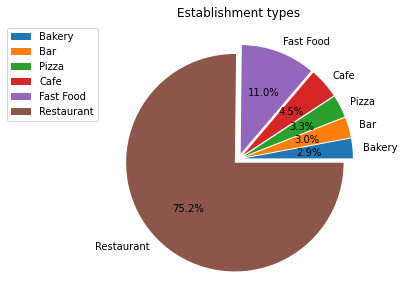

In [39]:
#Creating DF of establishment types
estab=rest.groupby('object_type')['id'].count().sort_values()

#Plotting pie chart to display proportions of establishment types
rcParams["figure.figsize"] = (5,5)
plt.pie(x=estab, autopct="%.1f%%", explode=[0.05]*6, labels=estab.keys())
plt.title("Establishment types")
plt.legend(bbox_to_anchor=(0,1))

plt.savefig("types.png");

Restaurants are in the lead in LA (75.2%), followed by fast food (11%), cafés (4.5%), pizza (3.3%), bars (3%), and bakeries (2.9%).

## 2) Investigate the proportions of chain and nonchain establishments. Plot a graph. <a id="6.2"></a>

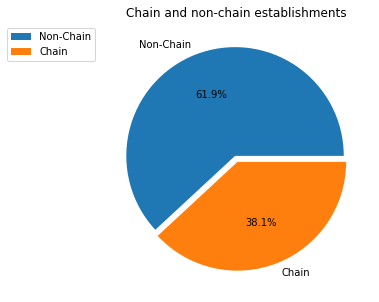

In [40]:
#Creating DF of chain and non-chain establishments
chain = rest.groupby('chain')["object_name"].count()

#Plotting pie chart to display proportions of chain and nonchain establishments
rcParams["figure.figsize"] = (5,5)
plt.pie(x=chain, autopct="%.1f%%",explode=[0.03]*2, labels=['Non-Chain','Chain'])
plt.title("Chain and non-chain establishments")
plt.legend(bbox_to_anchor=(0,1))

plt.savefig("chain.png");

61.9% of establishments in LA are non-chain, while 38.1% are chains.
This makes sense since most establishments are restaurants, most likely original and unique ones.
We see bakery, café, and fast food establishments are typically chains while pizza, restaurants and bars are mostly non-chains.

## 3) Which type of establishment is typically a chain? <a id="6.3"></a>

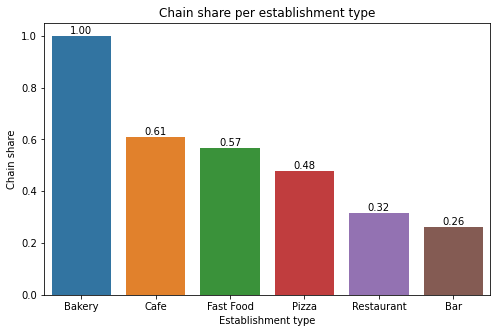

In [41]:
#Grouping by type to find chain shares
chain_types=(rest.groupby('object_type')['chain'].sum()/rest.groupby('object_type')['chain'].count()).sort_values(ascending=False)
chain_types.columns=['object_type', 'chain_percentage']

#Plotting bar plot to display chain establishments by type
rcParams["figure.figsize"] = (8,5)
ax = sns.barplot(x=chain_types.index, y=chain_types)
ax.set(xlabel="Establishment type", ylabel = "Chain share", title='Chain share per establishment type')

ax.bar_label(ax.containers[0], fmt='%.2f')

plt.savefig('chain types.png');

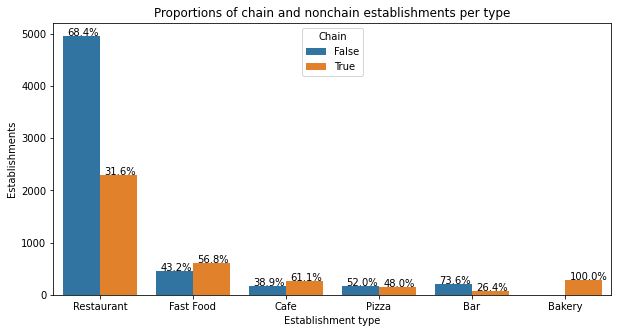

In [42]:
#Plotting bar chart to display proportions of chain and nonchain establishments per type
plt.figure(figsize = (10,5))
category_order = ['Restaurant', 'Fast Food', 'Cafe', 'Pizza', 'Bar', 'Bakery']
ax = sns.countplot('object_type', hue='chain', data=rest, order = category_order)
ax.legend(title = 'Chain')
ax.set(xlabel="Establishment type", ylabel="Establishments", title='Proportions of chain and nonchain establishments per type')

def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y))
            
with_hue(ax, rest.object_type, 6, 2) 
    
plt.savefig('chain types2.png');

Bakery (100%), café (61%), and fast food (57%) establishments are typically chains while pizza, restaurants and bars are mostly non-chains. 

## 4) What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats? <a id="6.4"></a>

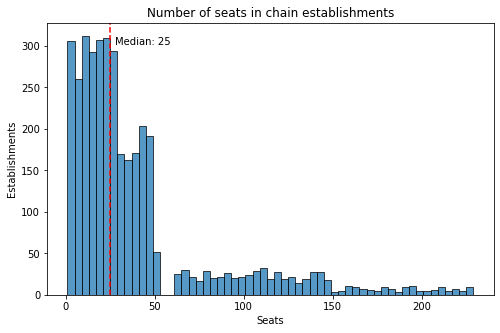

In [43]:
#Plotting histogram of number of seats in chain establishments
chain_seats = rest.query('chain==True')

rcParams["figure.figsize"] = (8,5)
ax= sns.histplot(chain_seats, x='number')
plt.axvline(chain_seats['number'].median(), color='red', linestyle='--')
min_ylim, max_ylim = plt.ylim()
plt.text(chain_seats['number'].median()*1.1, max_ylim*0.92, 'Median: {:.0f}'.format(chain_seats['number'].median()))
ax.set(xlabel=("Seats"), ylabel=("Establishments"), title=('Number of seats in chain establishments'))

plt.savefig('chain seats.png');

LA chains are characterized by many establishments with a small number of seats (up to 50). The average number of seats is 25. Missing values are seen in the range of ~50-60 seats, probably the gap between 'few' and 'many' seats.

## 5) Determine the average number of seats for each type of restaurant. On average, which type of restaurant has the greatest number of seats? Plot graphs. <a id="6.5"></a>

In [44]:
#Calculating average number of seats per establishment
avg_estab_seats = rest.groupby(['object_type'])['number'].median().reset_index()

#Plotting plot of seats per establishment
diction={'Bakery':'🥐','Fast Food':'🍔','Bar':'🍷','Cafe':'☕','Pizza':'🍕','Restaurant':'🍽️'}
avg_estab_seats['emoji1'] =avg_estab_seats['object_type'].apply(lambda x: diction.get(x))

bar = alt.Chart(avg_estab_seats, title="Average seats per establishment type").mark_bar().encode(
    x='object_type',
    y='number',
    color='object_type',
    text='object_type'
).properties(width=alt.Step(60))

emoji=alt.Chart(avg_estab_seats).mark_text(align='center',size=25).encode(
    x='object_type',
    y='number',
    text='emoji1')

text = alt.Chart(avg_estab_seats).mark_text(dy=30).encode(
    x='object_type',
    y='number',
    detail='object_type',
    text=alt.Text('number'))

bar+emoji+text

alt.LayerChart(...)

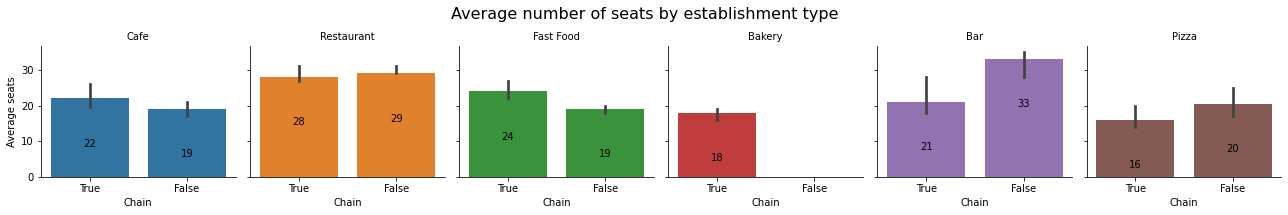

In [45]:
#Plotting plot of seats per establishment by type
ax = sns.FacetGrid(rest, col="object_type", hue='object_type')
ax.map(sns.barplot, "chain", "number", order=[True,False],estimator=np.median)
ax.fig.subplots_adjust(top=0.8)
ax.fig.suptitle('Average number of seats by establishment type', fontsize=16)
ax.set_axis_labels("Chain", "Average seats")
ax.set_titles(col_template="{col_name}")
g=ax

for ax in g.axes.ravel():
      for p in ax.patches:
            ax.annotate(format(p.get_height(), '.0f'), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='bottom', xytext = (0,-50), textcoords = 'offset points')

plt.savefig('establishment seats.png');

On average, restaurants have the most seats- 29, bars come in second with a close average of 28. People gather and spend more time in restaurants and bars. 

Fast food and cafes are next with a lower average of 21 seats, since people mostly order takeaway. Pizza is close with an average of 19 seats, given pizza is often delivered and then bakeries- 18, most likely due to the usually small establishment spaces, and people often taking coffee and pastries to go with no need for seats.

Establishment types with more seats in:
- Chains-  cafe, fast-food and bakery (only chains).
- Non-chains- restaurant, bar, pizza.

## 6) Put the data on street names from the address column in a separate column. <a id="6.6"></a>

In [46]:
#Adding uppercase street name column to rest DF
rest['street'] = rest['clean_address'].str.split(n=1, expand=True)[1].str.split(', ', n=1, expand=True)[0]
rest['street'] = rest['street'].str.upper()
rest                                                                             

,index,id,object_name,address,chain,object_type,number,clean_address,street
0,0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,"3708 ROCK, Los Angeles,USA",ROCK
1,1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,"100 WORLD, Los Angeles,USA",WORLD
2,2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,"6801 HOLLYWOOD, Los Angeles,USA",HOLLYWOOD
3,3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,"1814 SUNSET, Los Angeles,USA",SUNSET
4,4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,"2100 PARK, Los Angeles,USA",PARK
...,...,...,...,...,...,...,...,...,...
9643,9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122,"217 TEMPLE, Los Angeles,USA",TEMPLE
9644,9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93,"5750 MELROSE, Los Angeles,USA",MELROSE
9645,9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15,"6741 HOLLYWOOD, Los Angeles,USA",HOLLYWOOD
9646,9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6,"548 SPRING, Los Angeles,USA",SPRING


All seems in order.

## 7) Plot a graph of the top ten streets by number of restaurants. <a id="6.7"></a>

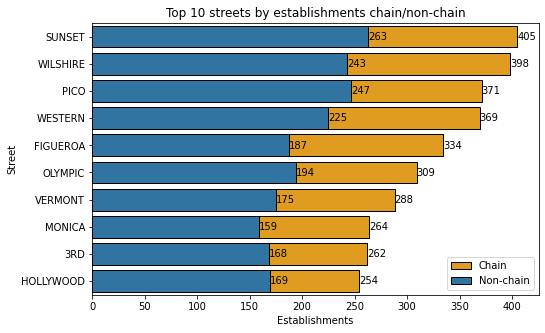

In [47]:
#Finding top 10 streets by establishments
rest_streets = rest.groupby('street')['id'].count().sort_values(ascending=False)
top_streets = rest_streets.head(10)

#Top 10 streets by establishments- chain/non-chain
top_10_c = rest.query('street in @top_streets.index').pivot_table(index='street',
                                                          values='id',columns='chain',
                                                          aggfunc='count',fill_value=0,
                                                          margins=True,margins_name='total').reset_index()

top_10_c = top_10_c.iloc[:-1,:].sort_values(by='total',ascending=False)
top_10_c.columns=['street','non_chain','chain','total']

#Plotting top 10 streets by number of establishments- chain/non-chain
f, ax = plt.subplots(figsize=(8,5))
sns.barplot(x ='total', y ='street', data = top_10_c, label = 'Chain', edgecolor = 'black',color='orange')

sns.barplot(x='non_chain', y='street', data=top_10_c,
            label='Non-chain', edgecolor='black',color='tab:blue')

ax.legend()
ax.set(xlabel=('Establishments'), ylabel=('Street'), title=("Top 10 streets by establishments chain/non-chain"))

for container in ax.containers:
    ax.bar_label(container,)

    plt.savefig('top ten streets.png');

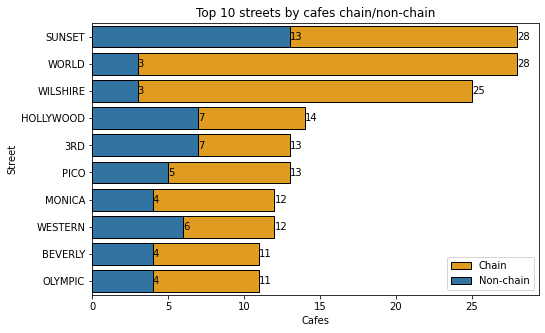

In [48]:
#Now the same for cafes
cafe=rest[(rest.object_type == "Cafe")]

#Finding top 10 streets by number of cafes
cafe_streets = cafe.groupby('street')['id'].count().sort_values(ascending=False)
top_streets_cafe = cafe_streets.head(10)

#Top 10 streets by cafes- chain/non-chain
top_10_c_cafe = cafe.query('street in @top_streets_cafe.index').pivot_table(index='street',
                                                          values='id',columns='chain',
                                                          aggfunc='count',fill_value=0,
                                                          margins=True,margins_name='total').reset_index()

top_10_c_cafe = top_10_c_cafe.iloc[:-1,:].sort_values(by='total',ascending=False)
top_10_c_cafe.columns=['street','non_chain','chain','total']

#Plotting top 10 streets by number of cafes- chain/non-chain
f, ax = plt.subplots(figsize=(8,5))
sns.barplot(x ='total', y ='street', data = top_10_c_cafe, label = 'Chain', edgecolor = 'black',color='orange')

sns.barplot(x='non_chain', y='street', data=top_10_c_cafe,
            label='Non-chain', edgecolor='black',color='tab:blue')

ax.legend()
ax.set(xlabel=('Cafes'), ylabel=('Street'), title=("Top 10 streets by cafes chain/non-chain"))

for container in ax.containers:
    ax.bar_label(container,)

plt.savefig('top ten streets2.png');

In [49]:
# the reviewer's cell: let'see an example:
usaddress.parse('12740 CULVER BLVD #B')

[('12740', 'AddressNumber'),
 ('CULVER', 'StreetName'),
 ('BLVD', 'StreetNamePostType'),
 ('#', 'OccupancyIdentifier'),
 ('B', 'OccupancyIdentifier')]

In [50]:
# the reviewer's cell: the street name is CULVER but we used the street name with additional information:
rest.query('street == "CULVER BLVD #B"')

,index,id,object_name,address,chain,object_type,number,clean_address,street


In [51]:
# the reviewer's cell: we could use this approach:
street_name = ''
for i in usaddress.parse('12740 CULVER BLVD #B'):
    if 'StreetName' == i[1]:
        street_name += i[0] + ' '
street_name.rstrip()

'CULVER'

Most establishments are on W Sunset BLVD (chain- 142, non-chain- 263), W Pico BLVD (chain- 124, non-chain- 247) and Wilshire BLVD (chain- 155, non-chain- 243). 
These top 10 streets are mostly central, having 254-405 establishments- mainly non-chain.

Most cafes are on W Sunset BLVD (chain- 15, non-chain- 13), World Way (chain- 25, non-chain- 3) and Wilshire BLVD (chain- 22, non-chain- 3). 
While these cafes on BLVDs are on main urban trajectories, World Way is a central point by the airport. Both BLVDs are on the top 10 streets having 11-28 cafes.

## 8) Find the number of streets that only have one restaurant. <a id="6.8"></a>

In [52]:
#Query to find and count streets with only one establishment
print(rest_streets[rest_streets == 1].count())

#Describing to see total streets and distribution
rest_streets.describe()

179


count    453.000000
mean      21.298013
std       55.373206
min        1.000000
25%        1.000000
50%        2.000000
75%       12.000000
max      405.000000
Name: id, dtype: float64

179 streets (out of 453) only have one establishment- 39.514%.

## 9) For streets with a lot of restaurants, look at the distribution of the number of seats. What trends can you see? <a id="6.9"></a>

29.0

count    3254.000000
mean       45.584204
std        47.960131
min         1.000000
25%        15.000000
50%        29.000000
75%        47.000000
max       229.000000
Name: number, dtype: float64


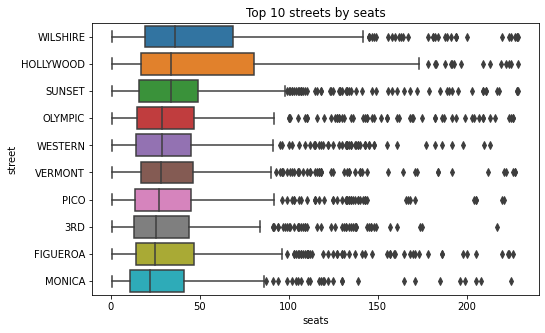

In [53]:
#Finding top 10 streets by seats, describing distribution and calculating median
top_seats = rest.query('street in @top_streets.index')
print(top_seats.number.median())
print('')
print(top_seats['number'].describe())

#Plotting top 10 streets by number of seats in descending order
order = top_seats.groupby('street')['number'].median().sort_values(ascending=False).reset_index()['street']

rcParams["figure.figsize"] = (8,5)
ax = sns.boxplot(y='street',x='number',data=top_seats, order=order) 
ax.set(ylabel="street", xlabel = "seats", title=('Top 10 streets by seats'))
    
plt.savefig('top seats.png');

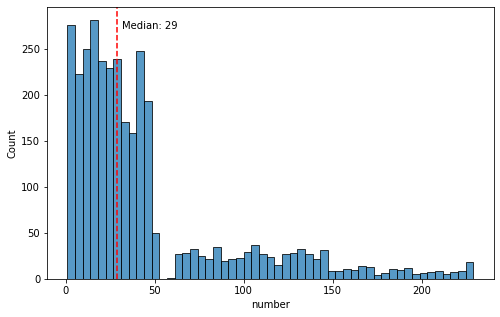

In [54]:
#Plotting histogram of number of seats in establishments on top streets
plt.figure(figsize = (8,5))
sns.histplot(top_seats['number'])
plt.axvline(top_seats['number'].median(),color='red', linestyle='--')
min_ylim, max_ylim = plt.ylim()
plt.text(top_seats['number'].median()*1.1, max_ylim*0.92, 'Median: {:.0f}'.format(top_seats['number'].median()))
ax.set(xlabel=("Seats"), ylabel=("Establishments"), title='Number of seats in establishments on top streets')

plt.savefig('top seats2.png');

Wilshire is leading in average restaurant capacity size, followed by Hollywood and Sunset. Most restaurants have almost the same median (29) and inter-quartile range (15-47), yet Hollywood and Wilshire have almost double the IQR with slightly higher median values.

Establishments on top streets are characterized by a small number of seats (up to 50). The average number of seats is 29. Missing values are seen in the range of ~50-60 seats, probably the gap between 'few' and 'many' seats.
The trend is the same as for chain establishments with a higher average by 4 seats.

# Conclusion <a id="7"></a>

This project provides actionable insights for investors on the proposed robot-run cafe.

In this project, we followed the methodology as follows:
- Open the date file and study the general information.
- Data preprocessing.
- Make calculations as required for the analysis.
- Data analysis.
- Plot graphs and then interpret the results.
- Create presentation.
- And now, final conclusion.

Findings:
- 4.5% of investigated establishments in LA are cafes.
- Overall 61.9% of establishments in LA are non-chain, while 38.1% are chains.
- Cafes in LA: 61.1% are chains, while 38.9% are non-chain.
- On average, cafes have 21 seats, out of which, cafe chain- 22, cafe non-chain- 19.
- Chain and non-chain cafes don't correlate directly with the order of leading streets.
- Most cafes are on W Sunset BLVD (28), World Way (28) and Wilshire BLVD (25). 

Overall conclusion:
Cafes in LA are mostly chains, with an average of 21 seats on main BLVDs.

Recommendations:
- LA is a spread-out city, mostly traveled by vehicles. Therefore, a recommendation for location should take into consideration on curb pedestrian traffic and proximity to points-of-interest such as business districts, shopping centers, transportation hubs and central stations, parks, and main BLVDs.

- Also, we would recommend on-the-go service approach, that is having no seats or perhaps a long bench fronting the street, which saves on space and maintenance. 

- Robot-run cafe is a global trend as demonstrated in Europe and Asia (for example: <https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwjv2pr5_uP1AhViQfEDHfmiCvwQFnoECAYQAQ&url=https%3A%2F%2Fwww.worldcoffeeportal.com%2FLatest%2FNews%2F2021%2FMay%2FThe-UK-s-premium-automated-coffee-sector-doubles-i&usg=AOvVaw37WAZZTjG0mlnPqf6okiKY>). Hence, we would pilot a single cafe with a potential end goal for growing into a chain and/or franchise.

- We would recommend to further expand to support drive-thru window and drone/Uber delivery services.

# Presentation <a id="8"></a>

<https://drive.google.com/file/d/1ibdiYY6IUjMB5vS71r0vwA2vI_4lOkG-/view?usp=sharing>